Import NYC_Open_Restaurant Dataset downloaded from NYC Open Data. Name it "dataset". 

In [236]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
dataset = pd.read_csv("NYC_Open_Restaurants.csv")

Dataset Description:
The dataset contains informations about restaurants that got approved of opening for outdoor seating in the New York City areas. All restaurants are complient with health guideline (all "Yes" at "healthcompliance_terms"). 
Question: 
1. How many restaurants are approved for sidewalk seating only, roadway seating only, and sidewalk & roadway seating? 
2. How many restaurants can serve alcohol?
3. Is region (borough) related for seating approval?
4. How many restaurants' seating interests match their final approvals? 
5. When did most restaurant apply and when did most restaurant get approved? 
6. How is alcohol apporval in each region? 
To answer these question, first look at dataset. Any missing data? Seems like there are some missing data, but they are not important now. 

In [33]:
print(dataset.info())
print(dataset.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 35 columns):
objectid                         1000 non-null int64
globalid                         1000 non-null object
seating_interest_sidewalk        1000 non-null object
restaurant_name                  1000 non-null object
legal_business_name              1000 non-null object
doing_business_as_dba            1000 non-null object
bulding_number                   1000 non-null object
street                           1000 non-null object
borough                          1000 non-null object
zip                              1000 non-null int64
business_address                 1000 non-null object
food_service_establishment       1000 non-null object
sidewalk_dimensions_length       826 non-null float64
sidewalk_dimensions_width        826 non-null float64
sidewalk_dimensions_area         826 non-null float64
roadway_dimensions_length        607 non-null float64
roadway_dimensions_width        

Question 1. How many restaurants are approved for sidewalk seating only, roadway seating only, and sidewalk & roadway seating? 

In [238]:
## Restaurnts Appoved for Sidewalk Seating Only
sw_approve = dataset["approved_for_sidewalk_seating"] == "yes"
rw_Napprove = dataset["approved_for_roadway_seating"] == "no"
sw_only = dataset[sw_approve&rw_Napprove]
#print(sw_only.shape)
print(str(len(sw_only))+" restaurants are approved for sidewalk seating only.")

## Restaurants Approved for Roadway Seating Only
sw_Napprove = dataset["approved_for_sidewalk_seating"] == "no"
rw_approve = dataset["approved_for_roadway_seating"] == "yes"
rw_only = dataset[sw_Napprove&rw_approve]
#print(rw_only.shape)
print(str(len(rw_only))+" restaurants are approved for roadway seating only.")

## Restautants Approved for Both
sw_rw = dataset[sw_approve&rw_approve]
#print(rw_only.shape)
print(str(len(sw_rw))+" restaurants are approved for both.")

## Restaurants Not Approved for Either
sw_rw_N = dataset[sw_Napprove&rw_Napprove]
#print(rw_only.shape)
print(str(len(sw_rw_N ))+" restaurants are not approved for either.")

## Display in Percentage
print('{:.1f}'.format(len(sw_only)/1000*100.0)+"% restaurants are approved for sidewalk seating only.")
print('{:.1f}'.format(len(rw_only)/1000*100)+"% restaurants are approved for roadway seating only.")
print('{:.1f}'.format(len(sw_rw)/1000*100)+"% restaurants are approved for both.")
print('{:.1f}'.format(len(sw_rw_N )/1000*100)+"% restaurants are not approved for either.")


347 restaurants are approved for sidewalk seating only.
128 restaurants are approved for roadway seating only.
479 restaurants are approved for both.
46 restaurants are not approved for either.
34.7% restaurants are approved for sidewalk seating only.
12.8% restaurants are approved for roadway seating only.
47.9% restaurants are approved for both.
4.6% restaurants are not approved for either.


2. How many restaurants can serve alcohol?

In [93]:
serve_alcohol = dataset["qualify_alcohol"].value_counts(normalize = True)
print('{:.1f}'.format(serve_alcohol["yes"]*100)+"% restaurants can serve alcohol.")
print('{:.1f}'.format(serve_alcohol["no"]*100)+"% restaurants cannot serve alcohol.")

62.9% restaurants can serve alcohol.
37.1% restaurants cannot serve alcohol.


3. Is region (borough) related? 
a. How many restaurants got seating approval in each region?

In [240]:
#Assign seating approval a value to each restaurant: 1 for sideway only, 2 for roadway only, 3 for both, 0 for none

seating = np.array([0]*1000)
seating[sw_only.index.values] = str(1)
seating[rw_only.index.values] = str(2)
seating[sw_rw.index.values] = str(3)
seating[sw_rw_N.index.values]=str(0)

#Add a column in dataset to seperated restaurant seating approval situations
dataset["Seating_Approval"] = seating

First, look at the general approval rate at each region. Seems like Staten island has the highest approval rate, but only 12 restaurants are counted at Staten Island. Manhattan has the most restaurant counted,and their approval rate is pretty nice---94.3%!

                        counts  percentage
borough       Approved                    
Bronx         1             40    0.909091
              0              4    0.090909
Brooklyn      1            244    0.960630
              0             10    0.039370
Manhattan     1            480    0.943026
              0             29    0.056974
Queens        1            178    0.983425
              0              3    0.016575
Staten Island 1             12    1.000000


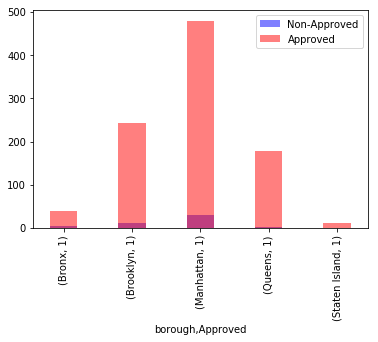

In [385]:
#Compute the general approval rate at each region.  
dataset2 = dataset
approval = np.array([0]*1000)
i = dataset[dataset["Seating_Approval"]!=0]
approval[i.index.values] = 1
dataset2["Approved"] = approval
counts = dataset2.groupby("borough")["Approved"].value_counts()
percentage = dataset2.groupby("borough")["Approved"].value_counts(normalize = True)
df = pd.concat([counts, percentage],axis=1, keys = ("counts", "percentage"))
print(df)

a = dataset2[dataset2["Approved"]==0].groupby("borough")["Approved"].value_counts()
b = dataset2[dataset2["Approved"]==1].groupby("borough")["Approved"].value_counts()
a.plot(x = ind,width = width, kind = "bar", color = "Blue", alpha = 0.5)
# xticks(np.arange(5), ("Bronx", "Brooklyn", "Manhattan", "Queens","Staten Island"))
b.plot(x = ind+width,width = width,kind = "bar", color = "Red", alpha = 0.5)
# b.xticks(np.arange(5), ("Bronx", "Brooklyn", "Manhattan", "Queens","Staten Island"))
plt.legend(["Non-Approved","Approved"])
plt.show()



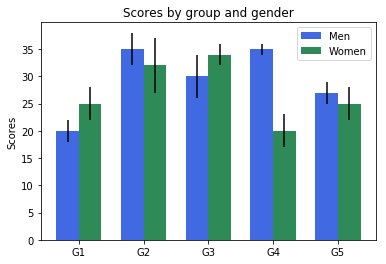

In [265]:
# N = 5
# menMeans = (20, 35, 30, 35, 27)
# menStd =   (2, 3, 4, 1, 2)

# ind = np.arange(N)  # the x locations for the groups
# width = 0.35       # the width of the bars

# fig = plt.figure()
# ax = fig.add_subplot(111)
# rects1 = ax.bar(ind, menMeans, width, color='royalblue', yerr=menStd)

# womenMeans = (25, 32, 34, 20, 25)
# womenStd =   (3, 5, 2, 3, 3)
# rects2 = ax.bar(ind+width, womenMeans, width, color='seagreen', yerr=womenStd)

# # add some
# ax.set_ylabel('Scores')
# ax.set_title('Scores by group and gender')
# ax.set_xticks(ind + width / 2)
# ax.set_xticklabels( ('G1', 'G2', 'G3', 'G4', 'G5') )

# ax.legend( (rects1[0], rects2[0]), ('Men', 'Women') )

# plt.show()

Second, let's look into details about the opening approval at each region. Remember: 1 for sideway only, 2 for roadway only, 3 for both, 0 for none. Seems like most restaurants in each region got approval for both roadway seating and sidewalk seating. Although at the Bronx, there is a higher proportion of sideway seatings than both seatings, the difference is very small. 

In [222]:
region_approval_data = dataset.groupby("borough")["Seating_Approval"]
counts = region_approval_data.value_counts(sort = True)
percentage = region_approval_data.value_counts(normalize = True, sort = True)
df = pd.concat([counts, percentage],axis=1, keys = ("counts", "percentage"))
print(df)


# region_data = dataset.groupby("borough")["approved_for_sidewalk_seating"].value_counts(normalize = True)
# print(region_data)
# region_data["Bronx"]["yes"]


                                counts  percentage
borough       Seating_Approval                    
Bronx         1                     20    0.454545
              3                     19    0.431818
              0                      4    0.090909
              2                      1    0.022727
Brooklyn      3                    119    0.468504
              1                     90    0.354331
              2                     35    0.137795
              0                     10    0.039370
Manhattan     3                    243    0.477407
              1                    170    0.333988
              2                     67    0.131631
              0                     29    0.056974
Queens        3                     88    0.486188
              1                     66    0.364641
              2                     24    0.132597
              0                      3    0.016575
Staten Island 3                     10    0.833333
              1                

4. How many restaurants' seating interests match their final approvals? 

Let's see how many restaurant's seating interests match their final approvals (Maybe we can also check which seating interests leads to better approval rate, although the approval rate is pretty high).

In [223]:
seating_interest = dataset["seating_interest_sidewalk"]
df = pd.concat([dataset["seating_interest_sidewalk"].value_counts(), dataset["seating_interest_sidewalk"].value_counts(normalize = True)],axis=1,  keys=('counts','percentage'))
print(df)

             counts  percentage
both            479       0.479
sidewalk        347       0.347
roadway         128       0.128
openstreets      46       0.046


Seems like most restaurants applied for both sidewalks and roadway seatings. 

6. How is alcohol approval in each region? 

In [228]:
counts = dataset.groupby("borough")["qualify_alcohol"].value_counts(sort = False)
percentage = dataset.groupby("borough")["qualify_alcohol"].value_counts(normalize = True,sort = False)
df = pd.concat([counts, percentage], axis = 1, keys = ("counts", "percentage"))
print(df)

                               counts  percentage
borough       qualify_alcohol                    
Bronx         no                   24    0.545455
              yes                  20    0.454545
Brooklyn      no                  120    0.472441
              yes                 134    0.527559
Manhattan     no                  140    0.275049
              yes                 369    0.724951
Queens        no                   87    0.480663
              yes                  94    0.519337
Staten Island yes                  12    1.000000


Just by looking, compare to other regions, Manhattan has the largest number of restaurant serving alcohol (369)! All the restaurant at Staten Island that are opening are serving alcohol. (Need to test significance)

Let's combine seating approval and alcohol serving, and see a general picture of the operation of most restaurants in NYC during this pandemic. 

p.s. Seating_Approval: 1 for sideway only, 2 for roadway only, 3 for both, 0 for none. 

In [230]:
counts = dataset.groupby(["borough","Seating_Approval"])["qualify_alcohol"].value_counts(sort = False)
percentage = dataset.groupby(["borough","Seating_Approval"])["qualify_alcohol"].value_counts(sort = False, normalize = True)
df = pd.concat([counts, percentage], axis = 1, keys=("count", "percentage"))
print(df)

                                                count  percentage
borough       Seating_Approval qualify_alcohol                   
Bronx         0                no                   1    0.250000
                               yes                  3    0.750000
              1                no                  13    0.650000
                               yes                  7    0.350000
              2                no                   1    1.000000
              3                no                   9    0.473684
                               yes                 10    0.526316
Brooklyn      0                no                   3    0.300000
                               yes                  7    0.700000
              1                no                  54    0.600000
                               yes                 36    0.400000
              2                no                  21    0.600000
                               yes                 14    0.400000
          